# Helen Cristina de Acypreste Rocha
### Formação Cientista de Dados - Data Science Academy
### Big Dara Real-Time Analytics com Python e Spark
### Projeto 3 - Prevendo o Nível de Satisfação dos Clientes do Santander

O objetivo do projeto é identificar clientes insatisfeitos com o banco, a fim de tomar medidas proativas para aumentar a felicidade do indivíduo e melhorar sua experiência bancária no Santander. Afinal, um cliente satisfeito é de fundamental importância para o sucesso do negócio.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregando os dados de teste
arq_test = '../data/test.csv'
df_test = pd.read_csv(arq_test)
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [3]:
# Carregando os dados de treino
arq_train = '../data/train.csv'
df_train = pd.read_csv(arq_train)
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
df_train.shape

(76020, 371)

In [5]:
# Verificando valores nulos
df_train.isnull().values.any()

False

In [6]:
# Descrição das variaveis
display(df_train.describe())

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
# Tipo das variáveis
df_train.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [8]:
# Variáveis do tipo int
var_int = df_train.select_dtypes(include='int64')
var_int = var_int.drop(columns=['ID'])
# Variáveis do tipo float
var_float = df_train.select_dtypes(include='float64')

In [9]:
len(var_int.columns)

259

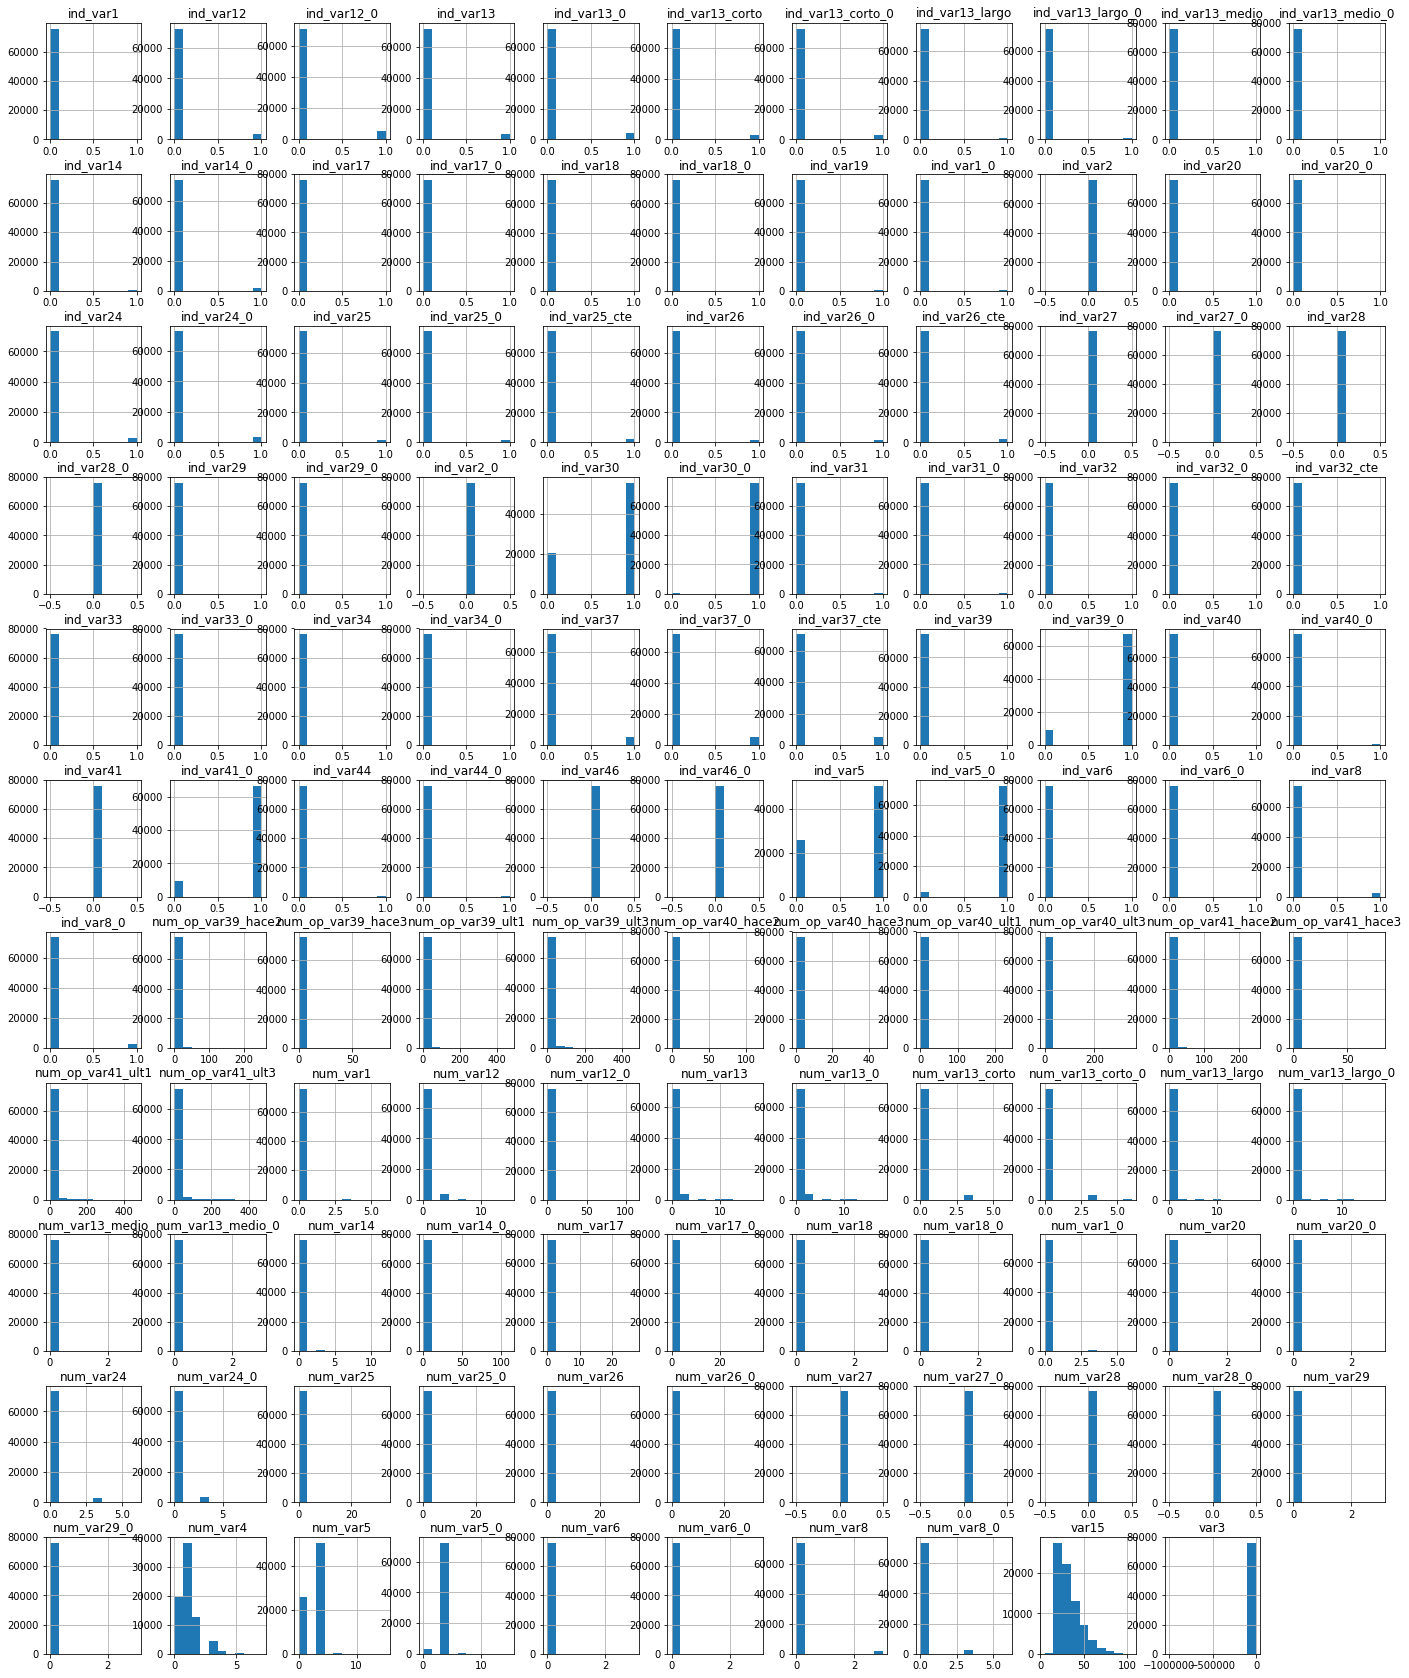

In [10]:
df_train[var_int.columns[0:120]].hist(figsize=(24,30));

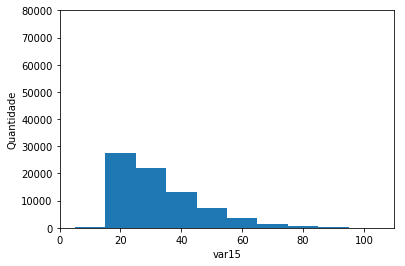

In [11]:
plt.hist(df_train['var15'])
plt.ylim(0, 80000)
plt.xlabel('var15')
plt.ylabel('Quantidade')
plt.show()


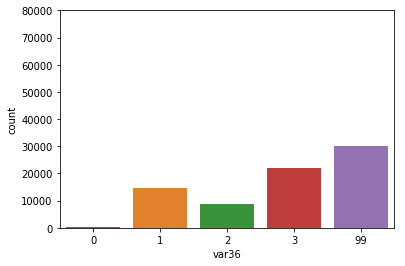

In [12]:
sns.countplot(df_train['var36'])
plt.ylim(0, 80000);

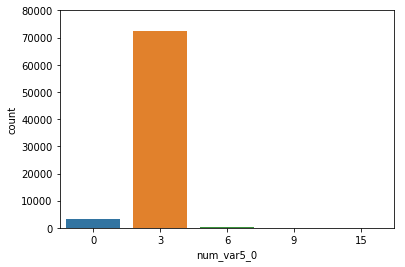

In [13]:
sns.countplot(df_train['num_var5_0'])
plt.ylim(0, 80000);

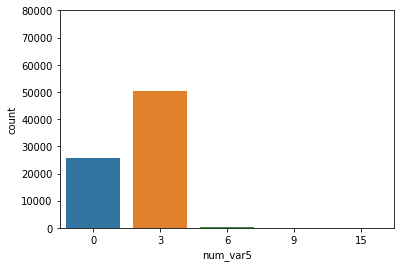

In [14]:
sns.countplot(df_train['num_var5'])
plt.ylim(0, 80000);

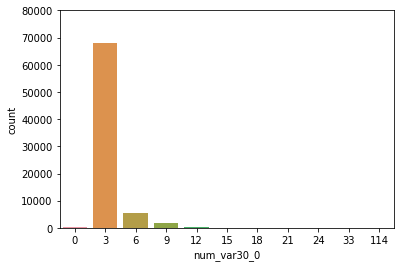

In [15]:
sns.countplot(df_train['num_var30_0'])
plt.ylim(0, 80000);

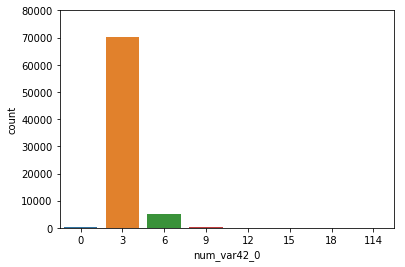

In [16]:
sns.countplot(df_train['num_var42_0'])
plt.ylim(0, 80000);

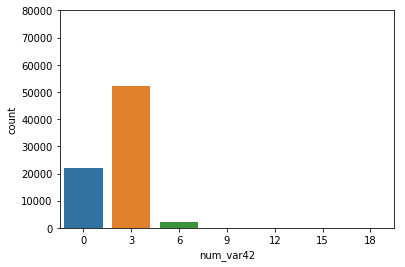

In [17]:
sns.countplot(df_train['num_var42'])
plt.ylim(0, 80000);

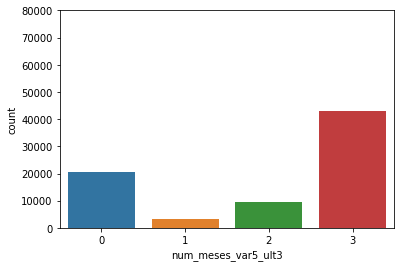

In [18]:
sns.countplot(df_train['num_meses_var5_ult3'])
plt.ylim(0, 80000);

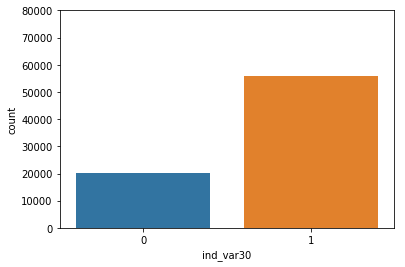

In [19]:
sns.countplot(df_train['ind_var30'])
plt.ylim(0, 80000);

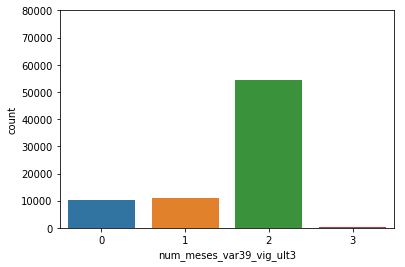

In [20]:
sns.countplot(df_train['num_meses_var39_vig_ult3'])
plt.ylim(0, 80000);

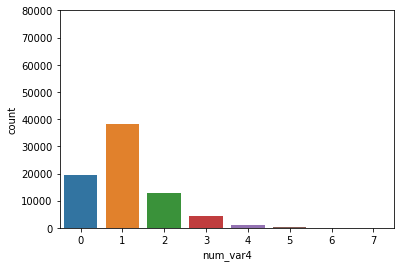

In [21]:
sns.countplot(df_train['num_var4'])
plt.ylim(0, 80000);

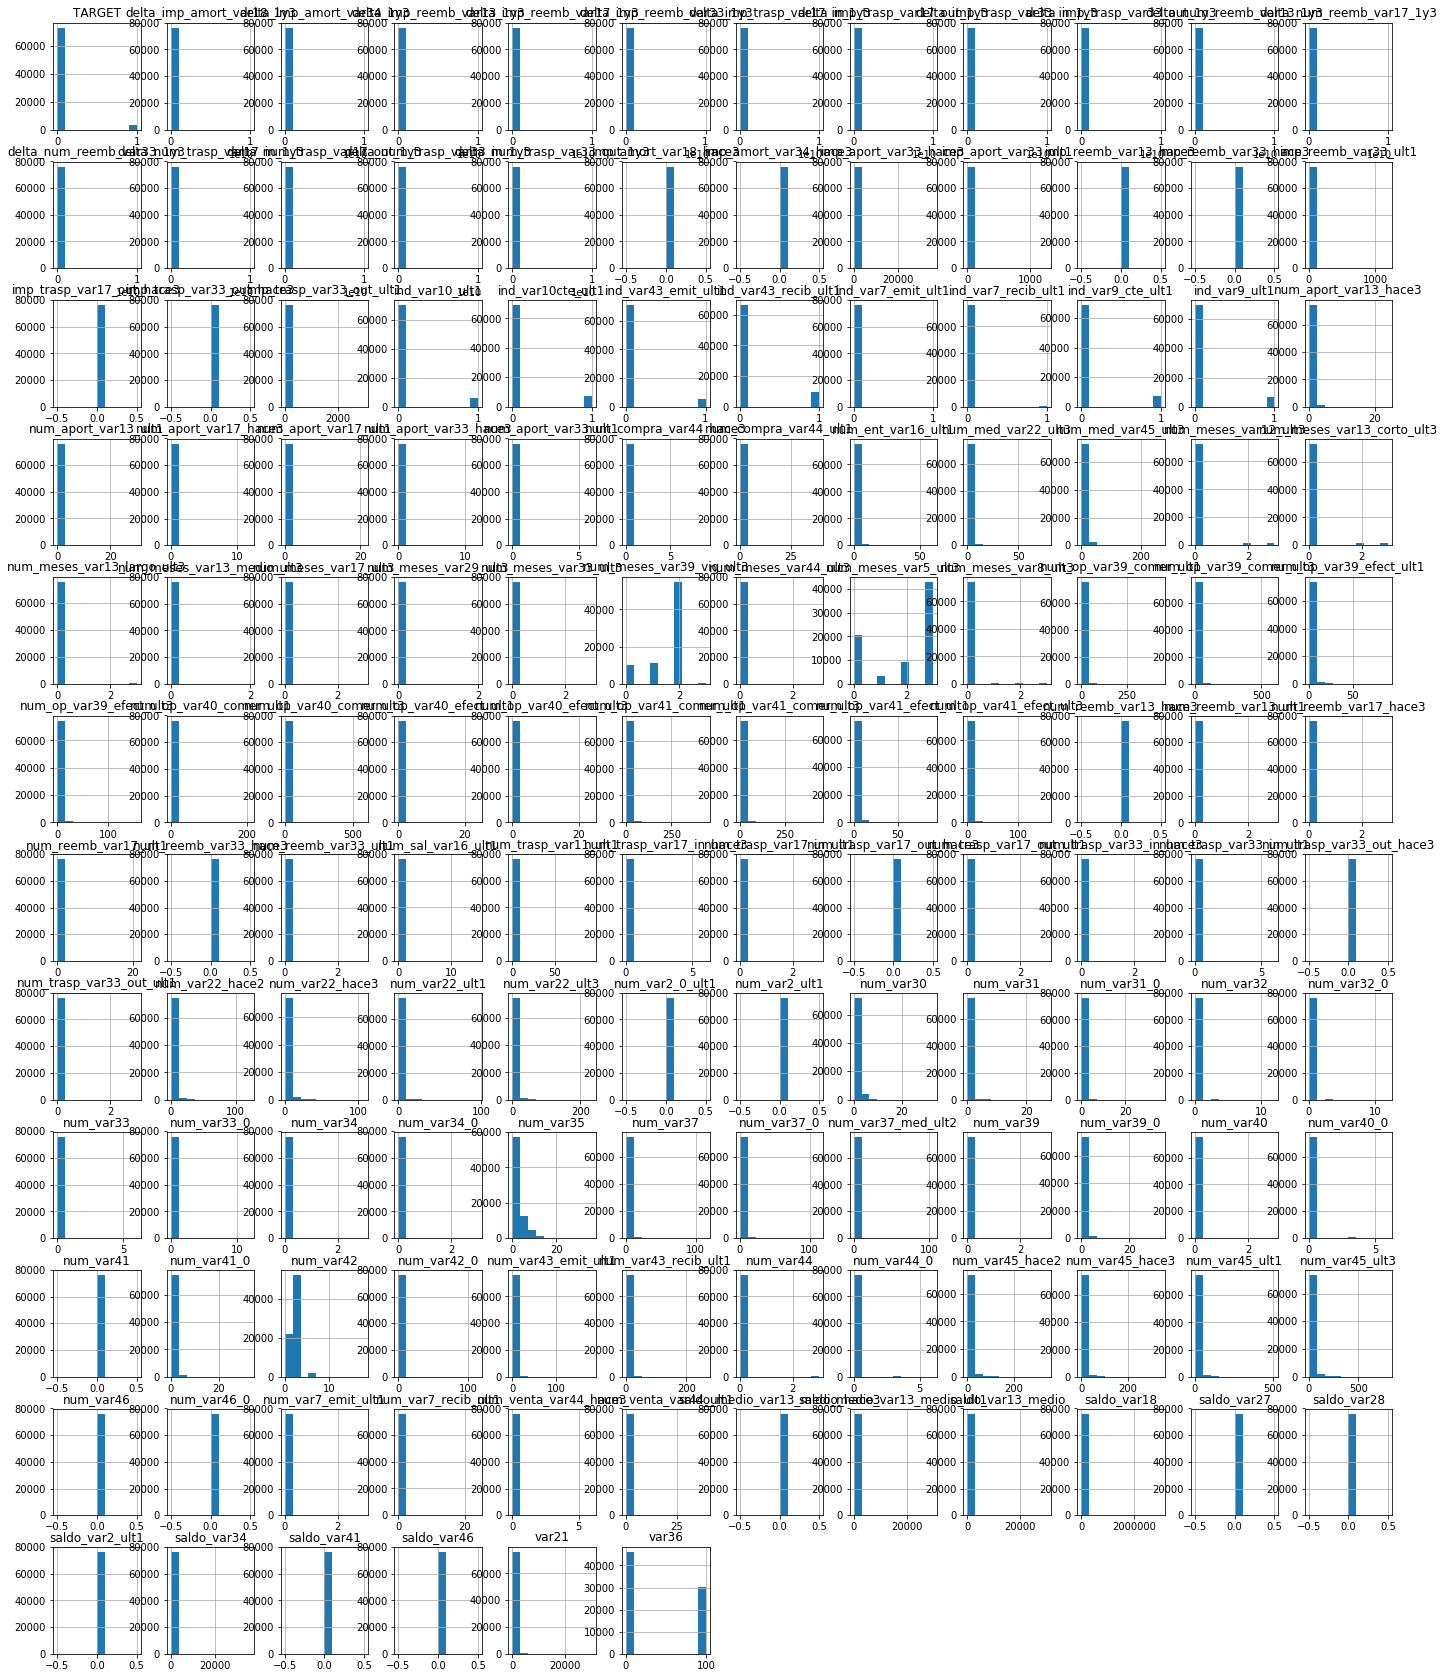

In [22]:
df_train[var_int.columns[121:259]].hist(figsize=(24,30));

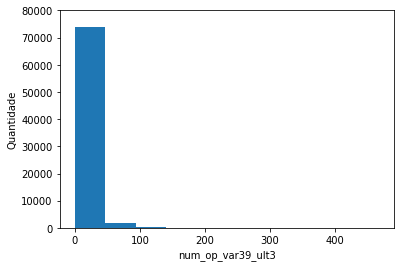

In [23]:
plt.hist(df_train['num_op_var39_ult3'])
plt.ylim(0, 80000)
plt.xlabel('num_op_var39_ult3')
plt.ylabel('Quantidade')
plt.show()

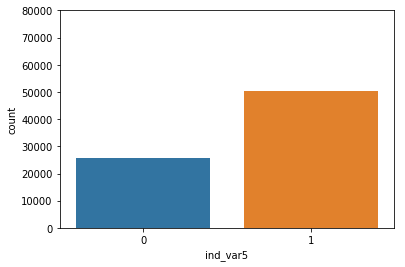

In [24]:
sns.countplot(df_train['ind_var5'])
plt.ylim(0, 80000);

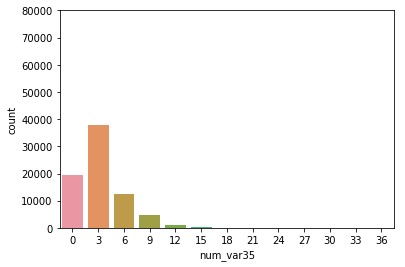

In [25]:
sns.countplot(df_train['num_var35'])
plt.ylim(0, 80000);

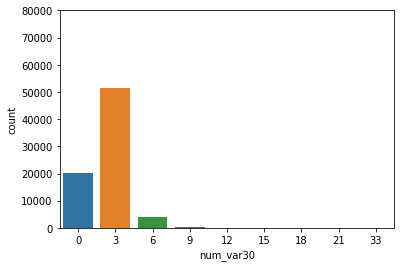

In [26]:
sns.countplot(df_train['num_var30'])
plt.ylim(0, 80000);

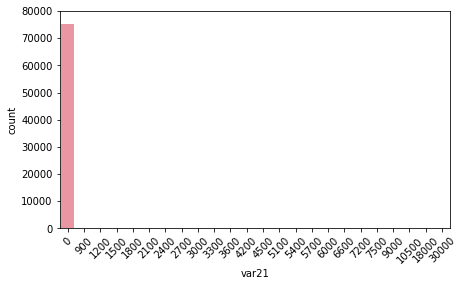

In [27]:
plt.figure(figsize=(7,4))
g = sns.countplot(df_train['var21'])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.ylim(0, 80000);

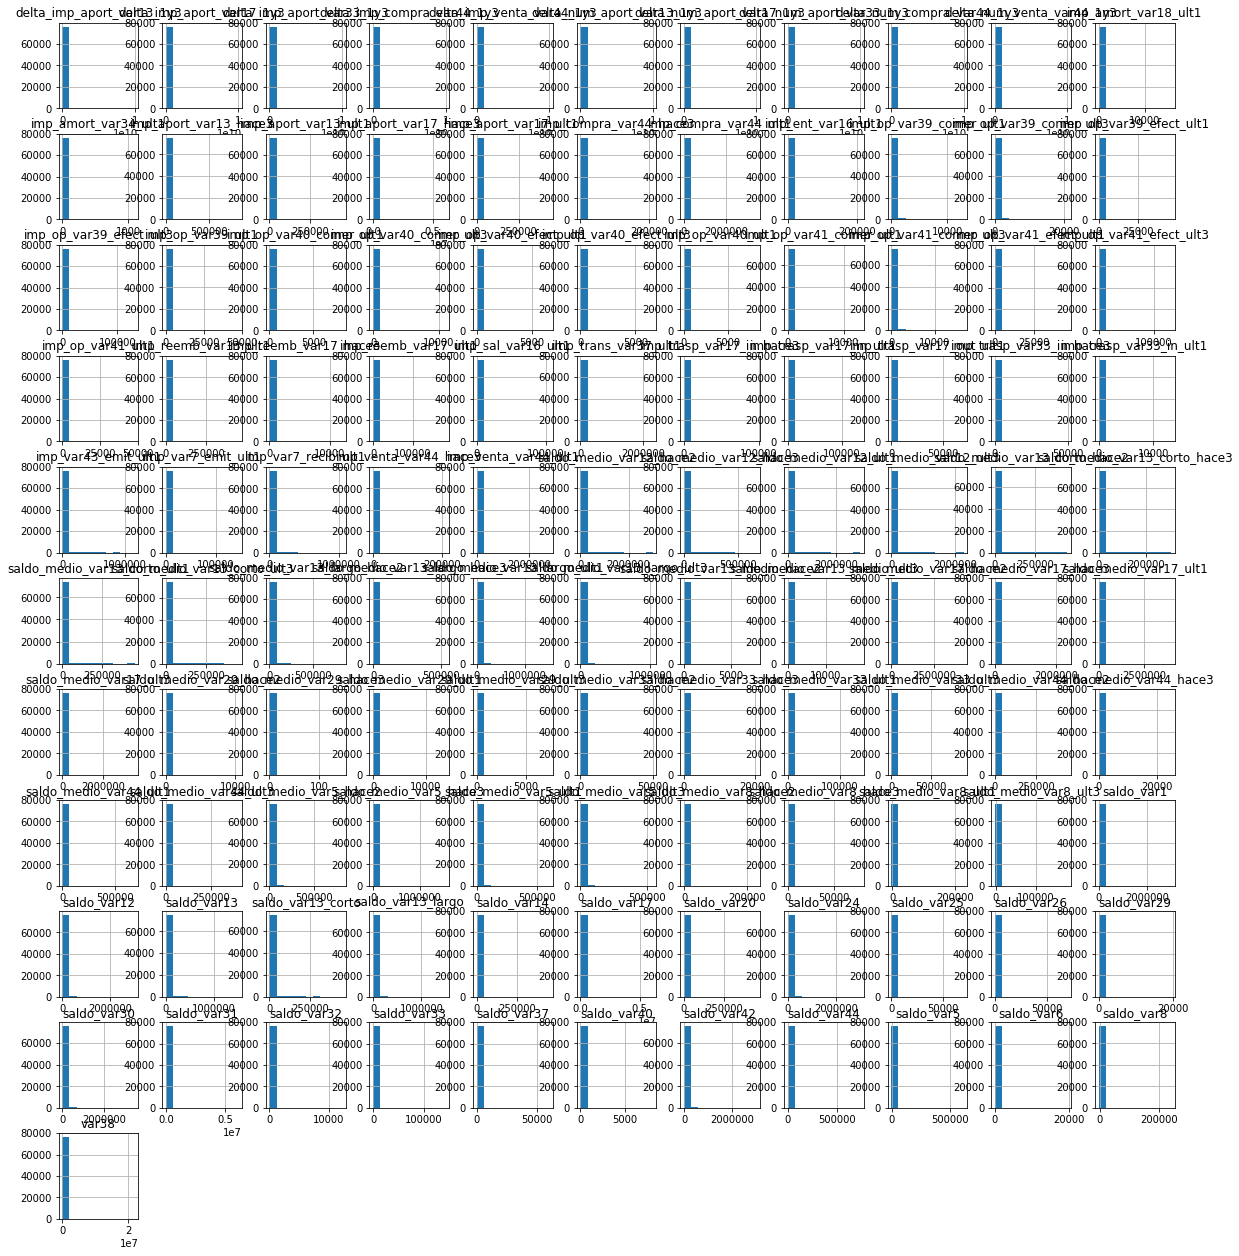

In [28]:
df_train[var_float.columns].hist(figsize=(20,22));

In [29]:
var_resp_count = df_train.groupby('TARGET').size()
print(f"Cliente Satisfeito: {var_resp_count[0]}\nCliente Insatisfeito: {var_resp_count[1]}")

Cliente Satisfeito: 73012
Cliente Insatisfeito: 3008


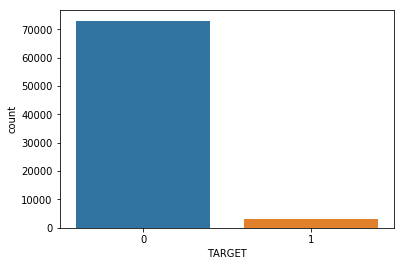

In [30]:
sns.countplot(x='TARGET', data=df_train);

In [31]:
# Correlação entre variavel TARGET e as outras features
target_corr = df_train.corr()['TARGET']
target_corr.sort_values(ascending=False)

TARGET                           1.000000
var36                            0.102919
var15                            0.101322
ind_var8_0                       0.046665
num_var8_0                       0.046622
imp_op_var39_efect_ult1          0.030380
imp_op_var41_efect_ult1          0.029479
num_var8                         0.027926
ind_var8                         0.027926
imp_op_var41_ult1                0.027586
imp_op_var39_ult1                0.027416
num_meses_var8_ult3              0.025943
num_var22_ult1                   0.025189
ind_var26_cte                    0.023538
ind_var25_cte                    0.023351
imp_op_var39_efect_ult3          0.022172
num_op_var39_efect_ult1          0.021783
imp_op_var41_efect_ult3          0.021486
num_op_var41_efect_ult1          0.021036
num_op_var39_efect_ult3          0.020237
imp_op_var40_efect_ult3          0.019965
num_op_var41_efect_ult3          0.019599
ind_var25_0                      0.019497
ind_var25                        0

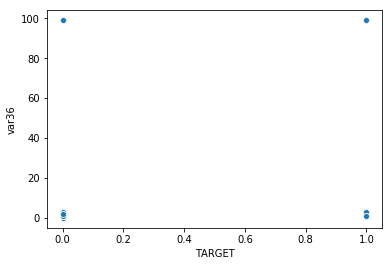

In [32]:
sns.scatterplot(
    x=df_train["TARGET"], 
    y=df_train["var36"]);

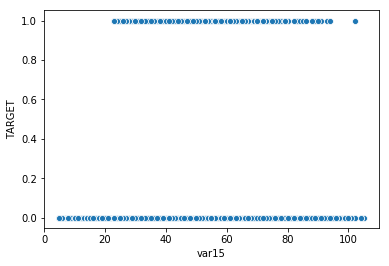

In [33]:
sns.scatterplot(
    x=df_train["var15"], 
    y=df_train["TARGET"]);

#### Balanceamento dos dados

In [34]:
# Transformar variavel 'TARGET' em variavel categorica
df_train['TARGET'] = df_train['TARGET'].astype('category')

In [35]:
# Balanceando os dados 
from imblearn.over_sampling import RandomOverSampler
x = df_train.iloc[:,1:370]
y = df_train['TARGET']

ros = RandomOverSampler()
x_over, y_over = ros.fit_sample(x, y)

1    73012
0    73012
Name: TARGET, dtype: int64


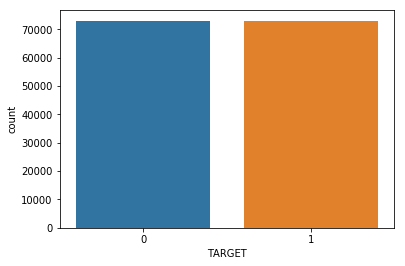

In [36]:
sns.countplot(y_over);
print(y_over.value_counts());

## Pre-processamento para aplicar modelo

### Seleção de variáveis

In [37]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(16,12))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.grid()
    plt.show()

#### Método Ensemble para Seleção de Variáveis

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

# Criando o modelo Feature Selection 
model = ExtraTreesClassifier()
model.fit(normalize(x_over), y_over)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [39]:
# Cria um dataframe com as features da base junto com score obtido pelo modelo ExtraTreesClassifier
df_atr = pd.DataFrame({'Features': x_over.columns,
                      'Score_Features': model.feature_importances_})

# Trazer as 30 variaveis com maior Score
rotulos = df_atr.sort_values(by=['Score_Features'], ascending=False)[0:20]
# rotulos

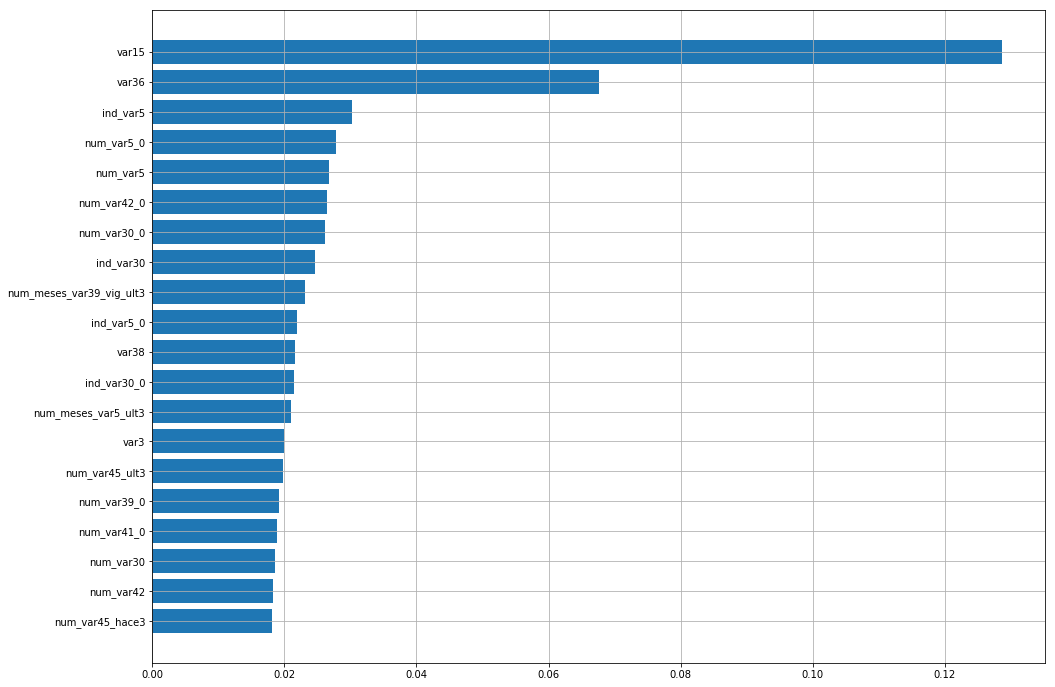

In [41]:
f_importances(rotulos['Score_Features'], rotulos['Features'])

In [42]:
# Seleciona os 20 atributos mais importantes. 
columns_import = rotulos['Features']
x_over_select = x_over[columns_import]

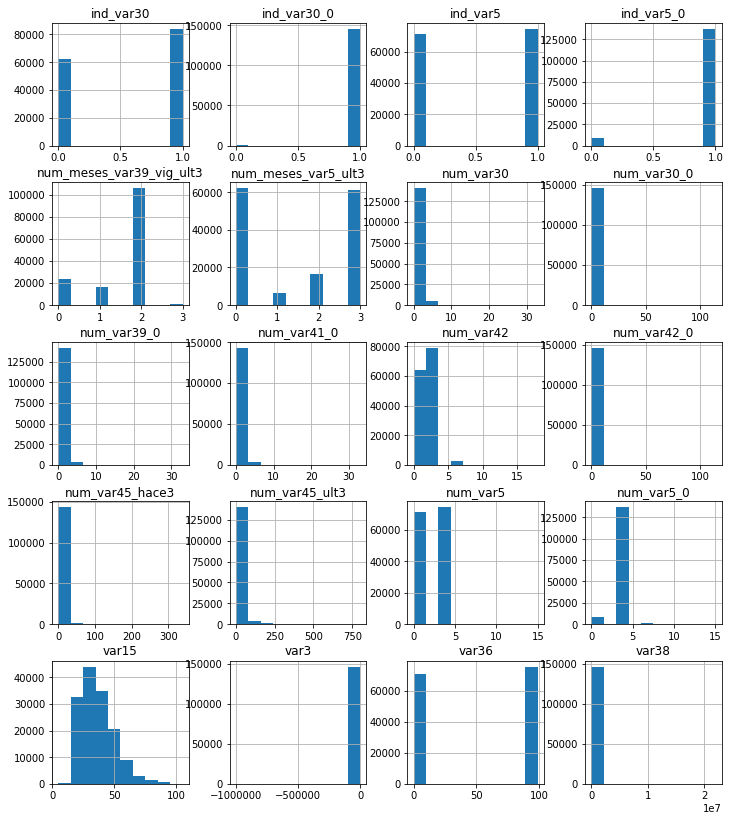

In [43]:
x_over_select.hist(figsize=(12,14));

#### SVM para seleção de atributos

In [ ]:
from sklearn.svm import LinearSVC
linearsvm = LinearSVC(random_state=0)

linearsvm = linearsvm.fit(normalize(x_over), y_over)
#svm_y_pred = linearsvm.predict(scaled_x_test)

In [ ]:
df_atr_svm = pd.DataFrame({'Features': x_over.columns,
                      'Score_Features': linearsvm.coef_[0]})

# Trazer as 20 variaveis com maior Score
rot_svm = df_atr_svm.sort_values(by=['Score_Features'], ascending=False)[0:20]
#rot_svm

In [ ]:
f_importances(rot_svm['Score_Features'], rot_svm['Features'])

In [ ]:
# Seleciona os 20 atributos mais importantes. 
col_import_svm = rot_svm['Features']
x_over_select_svm = x_over[col_import_svm]

### Criação do modelo

In [44]:
# Tabela de teste somente com as variaveis selecionadas
df_test_select = df_test[columns_import]

In [45]:
# Parametros para KFold
folds = 10
seed = 2

# Separando os dados em folds
kfold = KFold(folds, True, random_state = seed)

##### Regressão Logística

In [46]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression()

# Cross Validation
result = cross_val_score(modelo_lr, normalize(x_over_select), y_over, cv = kfold)

# Resultado da acurácia
print("Acurácia: %.3f" % (result.mean() * 100))

Acurácia: 63.844


##### Classification and Regression Trees

In [47]:
from sklearn.tree import DecisionTreeClassifier

modelo_trees = DecisionTreeClassifier()

# Cross Validation
result_cart = cross_val_score(modelo_trees, normalize(x_over_select), y_over, cv = kfold)

# Resultado da acurácia
print("Acurácia: %.3f" % (result_cart.mean() * 100))

Acurácia: 96.339


##### XGBoost

In [48]:
from xgboost import XGBClassifier

modelo_xgb = XGBClassifier()

# Cross Validation
result_xgboost = cross_val_score(modelo_xgb, normalize(x_over_select), y_over, cv = kfold)

# Resultado da acurácia
print("Acurácia: %.3f" % (result_xgboost.mean() * 100.0))

Acurácia: 87.995


### Principal Component Analysis (PCA)

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(x_over)

# Seleção de atributos
pca = PCA(n_components = 15)
fit = pca.fit(rescaledX)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)

Variância: [0.32722169 0.21021199 0.09572461 0.07533987 0.0591028  0.04221676
 0.02992184 0.02258673 0.01672075 0.01573952 0.01389869 0.00756876
 0.00675595 0.0062182  0.00604612]


In [50]:
# Aplique o PCA aos datasets
fit_treino = pca.fit_transform(x_over)
fit_teste = pca.fit_transform(df_test.iloc[:,1:370])

In [51]:
# DataFrames com as componentes geradas
df_treino_pca = pd.DataFrame(fit_treino)
df_teste_pca = pd.DataFrame(fit_teste)

##### Classification and Regression Trees com PCA

In [52]:
from sklearn.tree import DecisionTreeClassifier

modelo_trees_pca = DecisionTreeClassifier()

# Cross Validation
result_trees_pca = cross_val_score(modelo_trees_pca, df_treino_pca, y_over, cv = kfold)

# Resultado da acurácia
print("Acurácia: %.3f" % (result_trees_pca.mean() * 100))

Acurácia: 94.867


##### XGBoost com PCA

In [53]:
from xgboost import XGBClassifier

modelo_xgb_pca = XGBClassifier()

# Cross Validation
result_xgboost_pca = cross_val_score(modelo_xgb_pca, df_treino_pca, y_over, cv = kfold)

# Resultado da acurácia
print("Acurácia: %.3f" % (result_xgboost_pca.mean() * 100.0))

Acurácia: 76.144


##### Logistic Regression com PCA

In [54]:
from sklearn.linear_model import LogisticRegression

modelo_lr_pca = LogisticRegression()

# Cross Validation
result_lr_pca = cross_val_score(modelo_lr_pca, df_treino_pca, y_over, cv = kfold)

# Resultado da acurácia
print("Acurácia: %.3f" % (result_lr_pca.mean() * 100))

Acurácia: 50.405


##### Modelo com melhor acurácia: Classification and Regression Trees

In [55]:
# Fazendo previsões
fit = modelo_trees.fit(normalize(x_over_select), y_over)

y_pred = fit.predict(df_test_select)

In [56]:
result = pd.DataFrame({"ID": df_test['ID'], "TARGET": y_pred})
result["TARGET"]= result["TARGET"].astype(str)
result.shape

(75818, 2)

In [57]:
result['TARGET'].value_counts()

0    75002
1      816
Name: TARGET, dtype: int64

In [58]:
# Salvando o arquivo para submissão
result.to_csv("../Dados/submission.csv", index=False)